7.	Use K means clustering to segment patients in to groups and 
find out whether the grouping helps to us identify that a patient in particular groups are more frown to have malignant tumor.
(Don't use the label column for this purpose). 
State the number of centroids you chose and the corresponding 
malignant rate in each cluster. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing our cancer dataset
dataset = pd.read_csv('breast-cancer.csv')

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output

In [2]:
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
# Excluding label column
X = dataset[dataset.columns[1:10]] 

In [4]:
X.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [27]:
X.shape

(698, 9)

In [26]:

X = X.replace(to_replace ="?", 
                 value = 0) 
X.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [6]:
# Label Column
Y = dataset[dataset.columns[10]]
Y = Y.replace(to_replace = "?", 
                 value = 0) 
Y.head()
# 2 for benign, 4 for malignant

0    2
1    2
2    2
3    2
4    4
Name: 2.1, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y_binary = labelencoder_Y.fit_transform(Y)

In [12]:
Y_binary
# 0 for benign, 1 for malignant

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

# K Means for 2 centoids

In [9]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')


In [13]:
# Compute k-means clustering.
kmeans = kmns.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# Compute cluster centers and predict cluster index for each sample.
kY = kmns.fit_predict(X)
kY

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [14]:
# Compute clustering and transform X to cluster-distance space.
kfit = kmns.fit_transform(X)
kfit

array([[11.52365309,  7.47582609],
       [ 1.35242865, 13.75390952],
       [11.78458642,  7.76244144],
       ...,
       [17.16694682,  8.84476433],
       [12.91756734,  7.29705078],
       [13.77330981,  6.75890875]])

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
X_2D = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 698 samples in 0.119s...
[t-SNE] Computed neighbors for 698 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 698 / 698
[t-SNE] Mean sigma: 0.961374
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.618790
[t-SNE] KL divergence after 1950 iterations: 0.586039


Text(0.5, 1.0, 'Actual clusters')

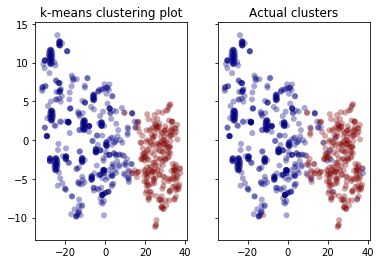

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_2D[:,0],X_2D[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(X_2D[:,0], X_2D[:,1],  c = Y_binary, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [28]:
# 0 for benign, 1 for malignant
# with the K means prediction
b = np.count_nonzero(kY==0)
m = np.count_nonzero(kY==1)
b, m

(464, 234)

In [33]:
# Malignant rate
Malignant_rate = m/(b+m)
Malignant_rate

0.335243553008596

In [31]:
# 0 for benign, 1 for malignant
# with actual labels
by = np.count_nonzero(Y_binary==0)
my = np.count_nonzero(Y_binary==1)
by, my

(457, 241)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_binary, kY)
cm

array([[446,  11],
       [ 18, 223]], dtype=int64)

In [38]:
from sklearn import metrics
a = metrics.accuracy_score(Y_binary, kY)
a

0.9584527220630372

Using K means, with 2 cluster centroids
The malignant rate predicted was 33.52%
95.84% cases were predicted correctly.
The data set has more benign ratio than malignant